In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#scoring and tuning 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from scipy.stats import randint

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('Fuel_Consumption_2000-2022.csv')
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
data.columns


Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [4]:
data.shape

(22556, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
data.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [7]:
data['YEAR'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [8]:
data['YEAR'].isnull().sum()

0

In [9]:
data['FUEL']

0        X
1        X
2        Z
3        Z
4        X
        ..
22551    Z
22552    Z
22553    Z
22554    Z
22555    Z
Name: FUEL, Length: 22556, dtype: object

In [10]:
data['FUEL'].nunique()

5

<Axes: xlabel='FUEL'>

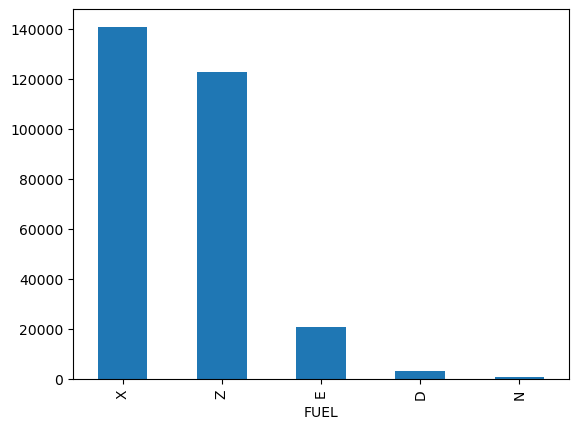

In [11]:
#X=Regular gasoline, Z= Premium gasoline, D=Diesel, E= Ethanol N= Natural gas
f= data.groupby(['FUEL'])['FUEL CONSUMPTION'].sum().nlargest()
f.plot(kind='bar')

<Axes: xlabel='FUEL'>

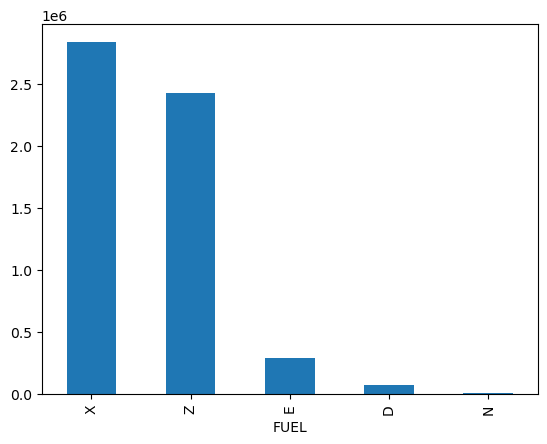

In [12]:
f2 = data.groupby(['FUEL'])['EMISSIONS'].sum().nlargest()
f2.plot(kind='bar')

In [13]:
data.groupby(['FUEL'])['FUEL CONSUMPTION'].sum().nsmallest()

FUEL
N       627.8
D      3054.5
E     20897.7
Z    122650.3
X    140663.5
Name: FUEL CONSUMPTION, dtype: float64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [15]:
data['MODEL'].unique()

array(['1.6EL', '3.2TL', '3.5RL', ..., 'V90 CC B6 AWD', 'XC60 B5 AWD',
       'XC60 B6 AWD'], dtype=object)

In [16]:
data['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [17]:
data['MAKE'].value_counts().head(20)

CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
DODGE             789
TOYOTA            759
PORSCHE           658
AUDI              609
NISSAN            608
VOLKSWAGEN        606
MAZDA             471
Ford              448
VOLVO             446
SUBARU            430
HYUNDAI           411
MINI              406
HONDA             405
Chevrolet         405
KIA               404
Name: MAKE, dtype: int64

In [18]:
#duplicates
data.duplicated().sum()

1

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(22555, 13)

In [21]:
data.groupby(['MAKE'])['EMISSIONS'].sum().nlargest().head()

MAKE
CHEVROLET        462672
GMC              409644
BMW              373670
FORD             329175
MERCEDES-BENZ    257434
Name: EMISSIONS, dtype: int64

Text(0.5, 1.0, 'Top Ten Car Company Contribution in the market')

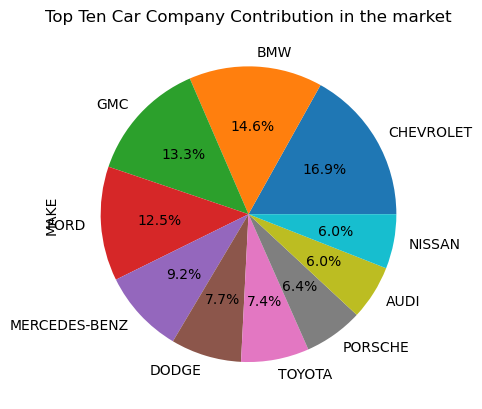

In [22]:
#top 10 car company contribution in the market
data['MAKE'].value_counts().head(10).plot(kind='pie',autopct="%0.1f%%").set_title('Top Ten Car Company Contribution in the market')

Text(0.5, 1.0, 'Top 10 Most used Vechicle Class')

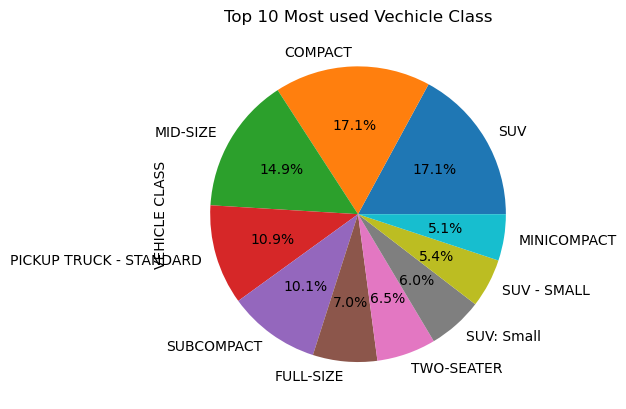

In [23]:
data['VEHICLE CLASS'].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%").set_title("Top 10 Most used Vechicle Class")

Axes(0.125,0.11;0.775x0.77)


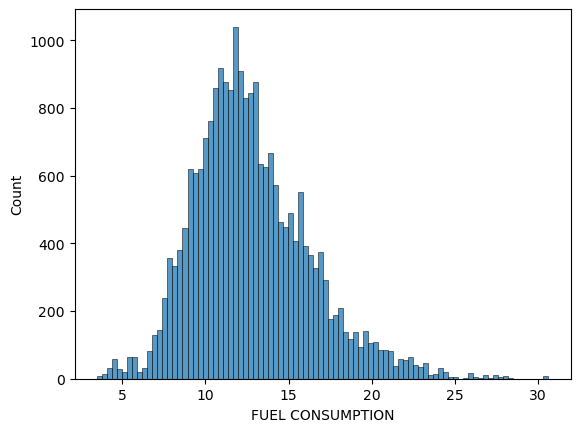

In [24]:
FUEL_CONSUMPTION=sns.histplot(data['FUEL CONSUMPTION'])
print(FUEL_CONSUMPTION)

<Axes: xlabel='EMISSIONS', ylabel='Count'>

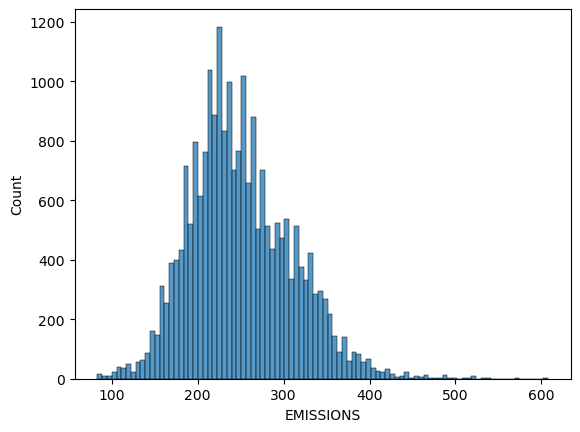

In [25]:
sns.histplot(data.EMISSIONS)

In [26]:
data.nlargest(10,'FUEL CONSUMPTION')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
2313,2003,FERRARI,ENZO,TWO-SEATER,6.0,12,AS6,Z,30.6,17.6,24.8,11,570
14511,2015,CHEVROLET,EXPRESS 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.6,20.6,26.1,11,418
14716,2015,GMC,SAVANA 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.6,20.6,26.1,11,418
14507,2015,CHEVROLET,EXPRESS 2500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.3,20.5,25.9,11,414
14712,2015,GMC,SAVANA 2500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.3,20.5,25.9,11,414
20786,2021,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
21733,2022,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
21734,2022,Bugatti,Chiron Super Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
21215,2021,Lamborghini,Aventador Sian Coupe,Two-seater,6.5,12,AM7,Z,28.3,16.8,23.1,12,539
21216,2021,Lamborghini,Aventador Sian Roadster,Two-seater,6.5,12,AM7,Z,28.3,16.8,23.1,12,539


In [27]:
data.nsmallest(10,'FUEL CONSUMPTION')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
12084,2012,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
13143,2013,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
14184,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.6,4.0,3.8,74,87
9912,2010,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
11009,2011,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
12083,2012,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
13142,2013,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
13684,2014,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,3.7,4.0,3.8,74,87
14183,2014,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
328,2000,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,3.9,3.2,3.6,78,83


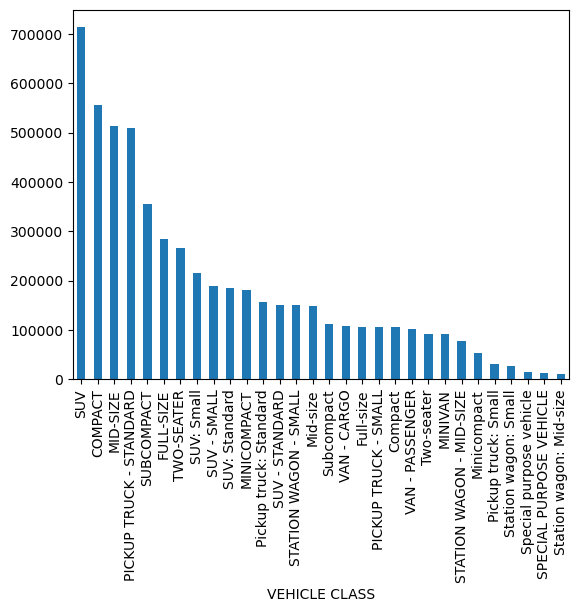

In [28]:
y = data.groupby(['VEHICLE CLASS'])['EMISSIONS'].sum().nlargest(30)

y.plot(kind='bar')
plt.show()

In [29]:
data.nsmallest(10,'EMISSIONS')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
328,2000,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,3.9,3.2,3.6,78,83
982,2001,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.2,3.6,78,83
1702,2002,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.2,3.6,78,83
2457,2003,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.2,3.6,78,83
3317,2004,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.3,3.6,78,83
4259,2005,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.3,3.6,78,83
5257,2006,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.3,3.6,78,83
12084,2012,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
13143,2013,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
9912,2010,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87


In [30]:
data.nlargest(10,'EMISSIONS')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
20786,2021,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
21733,2022,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
21734,2022,Bugatti,Chiron Super Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608
2313,2003,FERRARI,ENZO,TWO-SEATER,6.0,12,AS6,Z,30.6,17.6,24.8,11,570
21215,2021,Lamborghini,Aventador Sian Coupe,Two-seater,6.5,12,AM7,Z,28.3,16.8,23.1,12,539
21216,2021,Lamborghini,Aventador Sian Roadster,Two-seater,6.5,12,AM7,Z,28.3,16.8,23.1,12,539
19846,2020,Bugatti,Divo,Two-seater,8.0,16,AM7,Z,27.2,18.0,23.0,12,537
20267,2020,Lamborghini,Aventador Sian Coupe,Two-seater,6.5,12,AM7,Z,28.1,16.6,22.9,12,535
20268,2020,Lamborghini,Aventador Sian Roadster,Two-seater,6.5,12,AM7,Z,28.1,16.6,22.9,12,535
215,2000,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12,M6,Z,27.7,16.6,22.7,12,522


In [31]:
data_F=data[['YEAR','MAKE','FUEL CONSUMPTION','EMISSIONS']]
x=data_F.nlargest(10,'EMISSIONS')
print(x)

       YEAR         MAKE  FUEL CONSUMPTION  EMISSIONS
20786  2021      Bugatti              30.3        608
21733  2022      Bugatti              30.3        608
21734  2022      Bugatti              30.3        608
2313   2003      FERRARI              30.6        570
21215  2021  Lamborghini              28.3        539
21216  2021  Lamborghini              28.3        539
19846  2020      Bugatti              27.2        537
20267  2020  Lamborghini              28.1        535
20268  2020  Lamborghini              28.1        535
215    2000      FERRARI              27.7        522


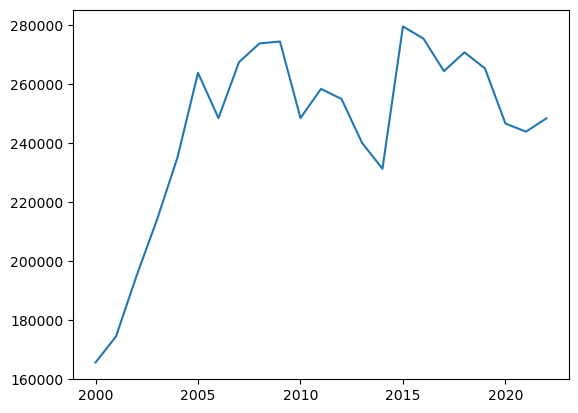

In [32]:
y = data.groupby(['YEAR'])['EMISSIONS'].sum()
plt.plot(y)

In [33]:
y= data[['YEAR','FUEL CONSUMPTION']]
y1 = y.groupby(['YEAR']).mean().nlargest(10, 'FUEL CONSUMPTION')
#y1.plot()


      FUEL CONSUMPTION
YEAR                  
2009           14361.8
2015           14321.5
2008           14208.1
2007           13916.1
2016           13790.0
2011           13727.0
2012           13572.8
2005           13555.1
2018           13387.9
2017           13134.7
2019           13067.1
2010           13027.6
2013           12831.4
2006           12742.3
2014           12261.1
2020           12059.7
2004           12049.7
2022           11983.7
2021           11794.4
2003           10914.6
2002            9959.4
2001            8837.1
2000            8373.0


<Axes: xlabel='YEAR'>

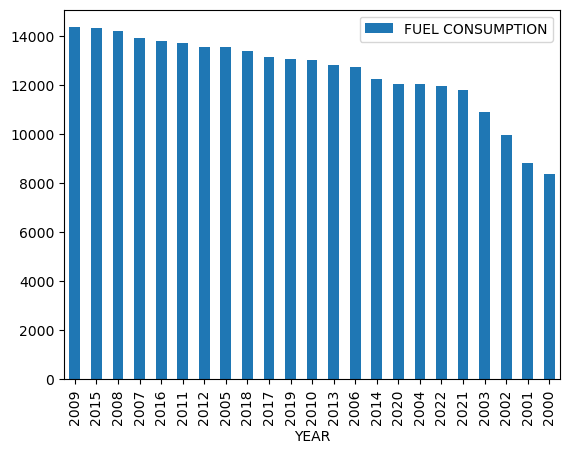

In [34]:
y= data[['YEAR','FUEL CONSUMPTION']]
Grouped_Fuel_Consumption_Per_Year =y.groupby(['YEAR']).sum().nlargest(50, 'FUEL CONSUMPTION')
print(Grouped_Fuel_Consumption_Per_Year)
Grouped_Fuel_Consumption_Per_Year.plot(kind='bar')

       EMISSIONS
YEAR            
2002  263.435135
2004  261.871938
2003  261.028049
2022  260.110995
2000  259.548589
2021  259.180659
2005  258.931305
2001  256.901325
2006  256.706612
2007  256.453500
2020  254.801653
2008  253.775718
2009  251.343407
2019  251.279356
2018  250.037858
2017  249.924386
2016  248.163964
2015  246.970848
2010  243.408423
2011  240.134758
2012  235.895467
2013  226.987713
2014  222.405769


<Axes: xlabel='YEAR'>

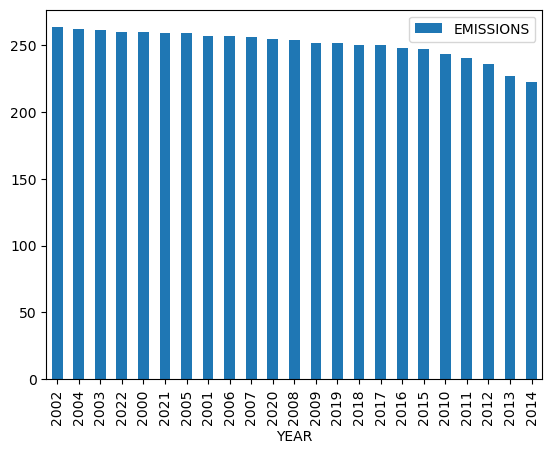

In [35]:
y= data[['YEAR','EMISSIONS']]
Grouped_Emissions_Per_Year =y.groupby(['YEAR']).mean().nlargest(50, 'EMISSIONS')
print(Grouped_Emissions_Per_Year)
Grouped_Emissions_Per_Year.plot(kind='bar')

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

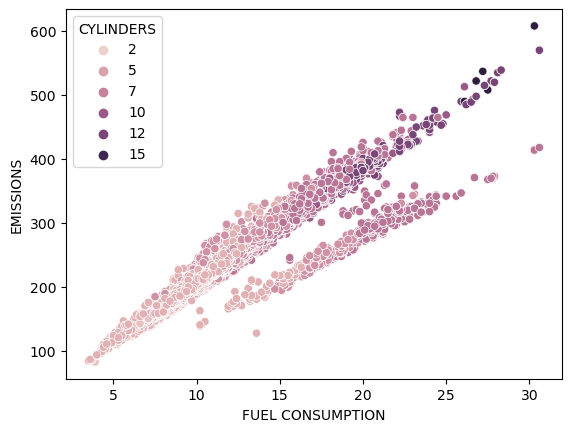

In [36]:
sns.scatterplot(data=data,x='FUEL CONSUMPTION',y='EMISSIONS',hue='CYLINDERS')

In [37]:
data_grouped = data.groupby(['FUEL CONSUMPTION'])['EMISSIONS'].mean().nlargest(10)
data_grouped.head(10)

FUEL CONSUMPTION
28.3    539.000000
27.2    537.000000
28.1    535.000000
30.3    530.400000
26.8    515.142857
27.3    515.000000
26.1    501.500000
26.6    493.000000
26.5    489.000000
26.3    487.000000
Name: EMISSIONS, dtype: float64

<Axes: xlabel='ENGINE SIZE', ylabel='EMISSIONS'>

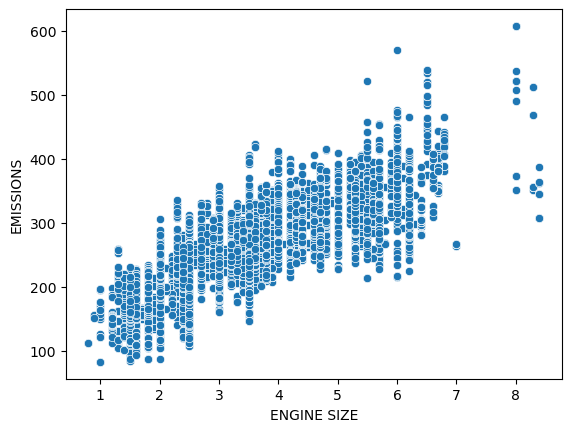

In [38]:
sns.scatterplot(x='ENGINE SIZE', y='EMISSIONS', data=data)

<Axes: xlabel='CYLINDERS', ylabel='EMISSIONS'>

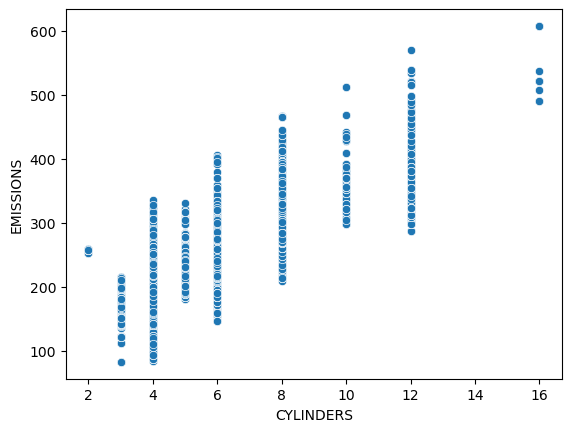

In [39]:
sns.scatterplot(x='CYLINDERS', y='EMISSIONS', data=data)

<Axes: xlabel='HWY (L/100 km)', ylabel='EMISSIONS'>

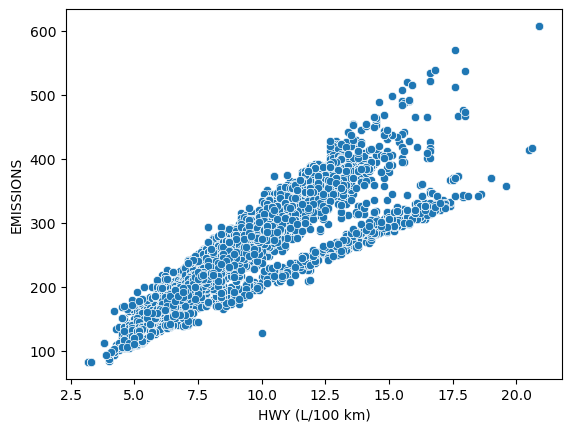

In [40]:
sns.scatterplot(x='HWY (L/100 km)', y='EMISSIONS', data=data)

In [41]:
data['TRANSMISSION'].unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AS6', 'AV', 'A6',
       'AM6', 'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8',
       'AV6', 'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10',
       'AV1'], dtype=object)

In [93]:
data.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'FUEL_E', 'FUEL_N',
       'FUEL_X', 'FUEL_Z'],
      dtype='object')

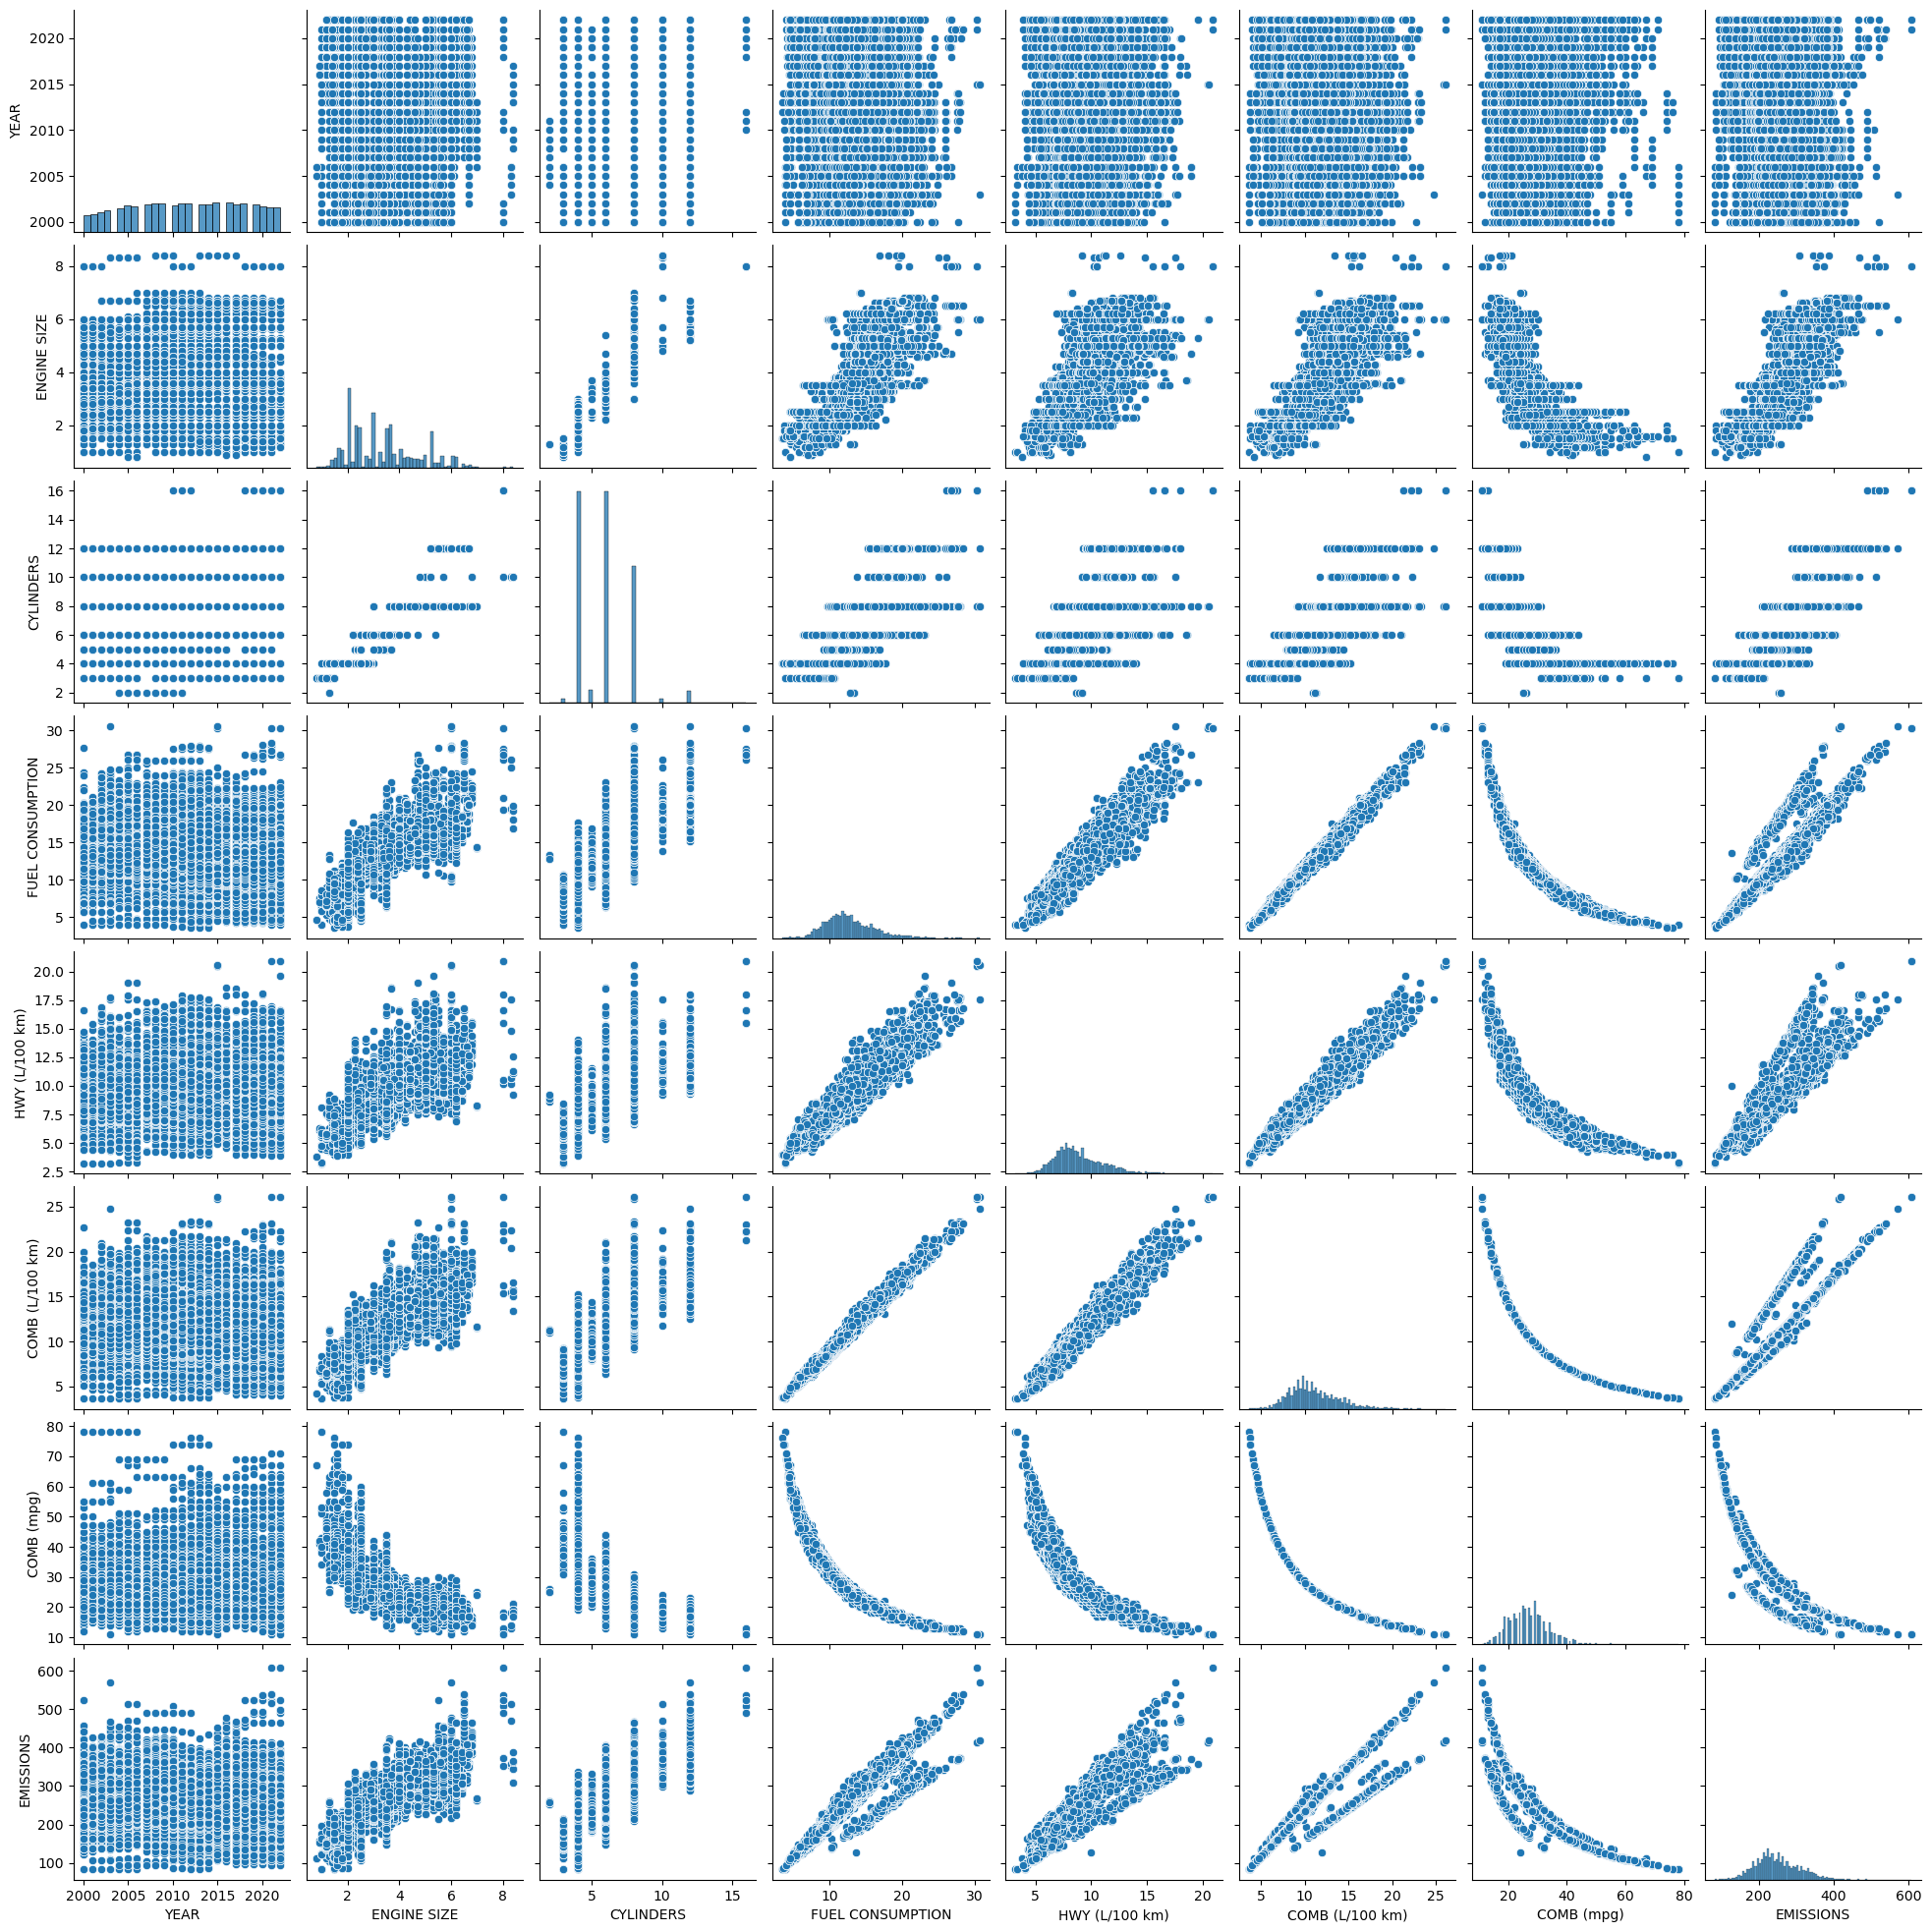

In [43]:
sns.pairplot(data, hue=None,diag_kind="hist")

In [44]:
data.drop(['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION'], axis=1, inplace=True)

In [45]:
data.drop(['YEAR'], axis=1, inplace=True)

In [46]:
data.head()

,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,X,9.2,6.7,8.1,35,186
1,1.6,4,X,8.5,6.5,7.6,37,175
2,3.2,6,Z,12.2,7.4,10.0,28,230
3,3.5,6,Z,13.4,9.2,11.5,25,264
4,1.8,4,X,10.0,7.0,8.6,33,198


In [47]:
data.dtypes

ENGINE SIZE         float64
CYLINDERS             int64
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [48]:
data=pd.get_dummies(data, drop_first=True)
data.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,1.6,4,9.2,6.7,8.1,35,186,0,0,1,0
1,1.6,4,8.5,6.5,7.6,37,175,0,0,1,0
2,3.2,6,12.2,7.4,10.0,28,230,0,0,0,1
3,3.5,6,13.4,9.2,11.5,25,264,0,0,0,1
4,1.8,4,10.0,7.0,8.6,33,198,0,0,1,0


In [49]:
data.dtypes

ENGINE SIZE         float64
CYLINDERS             int64
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
FUEL_E                uint8
FUEL_N                uint8
FUEL_X                uint8
FUEL_Z                uint8
dtype: object

In [50]:
data.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'FUEL_E', 'FUEL_N',
       'FUEL_X', 'FUEL_Z'],
      dtype='object')

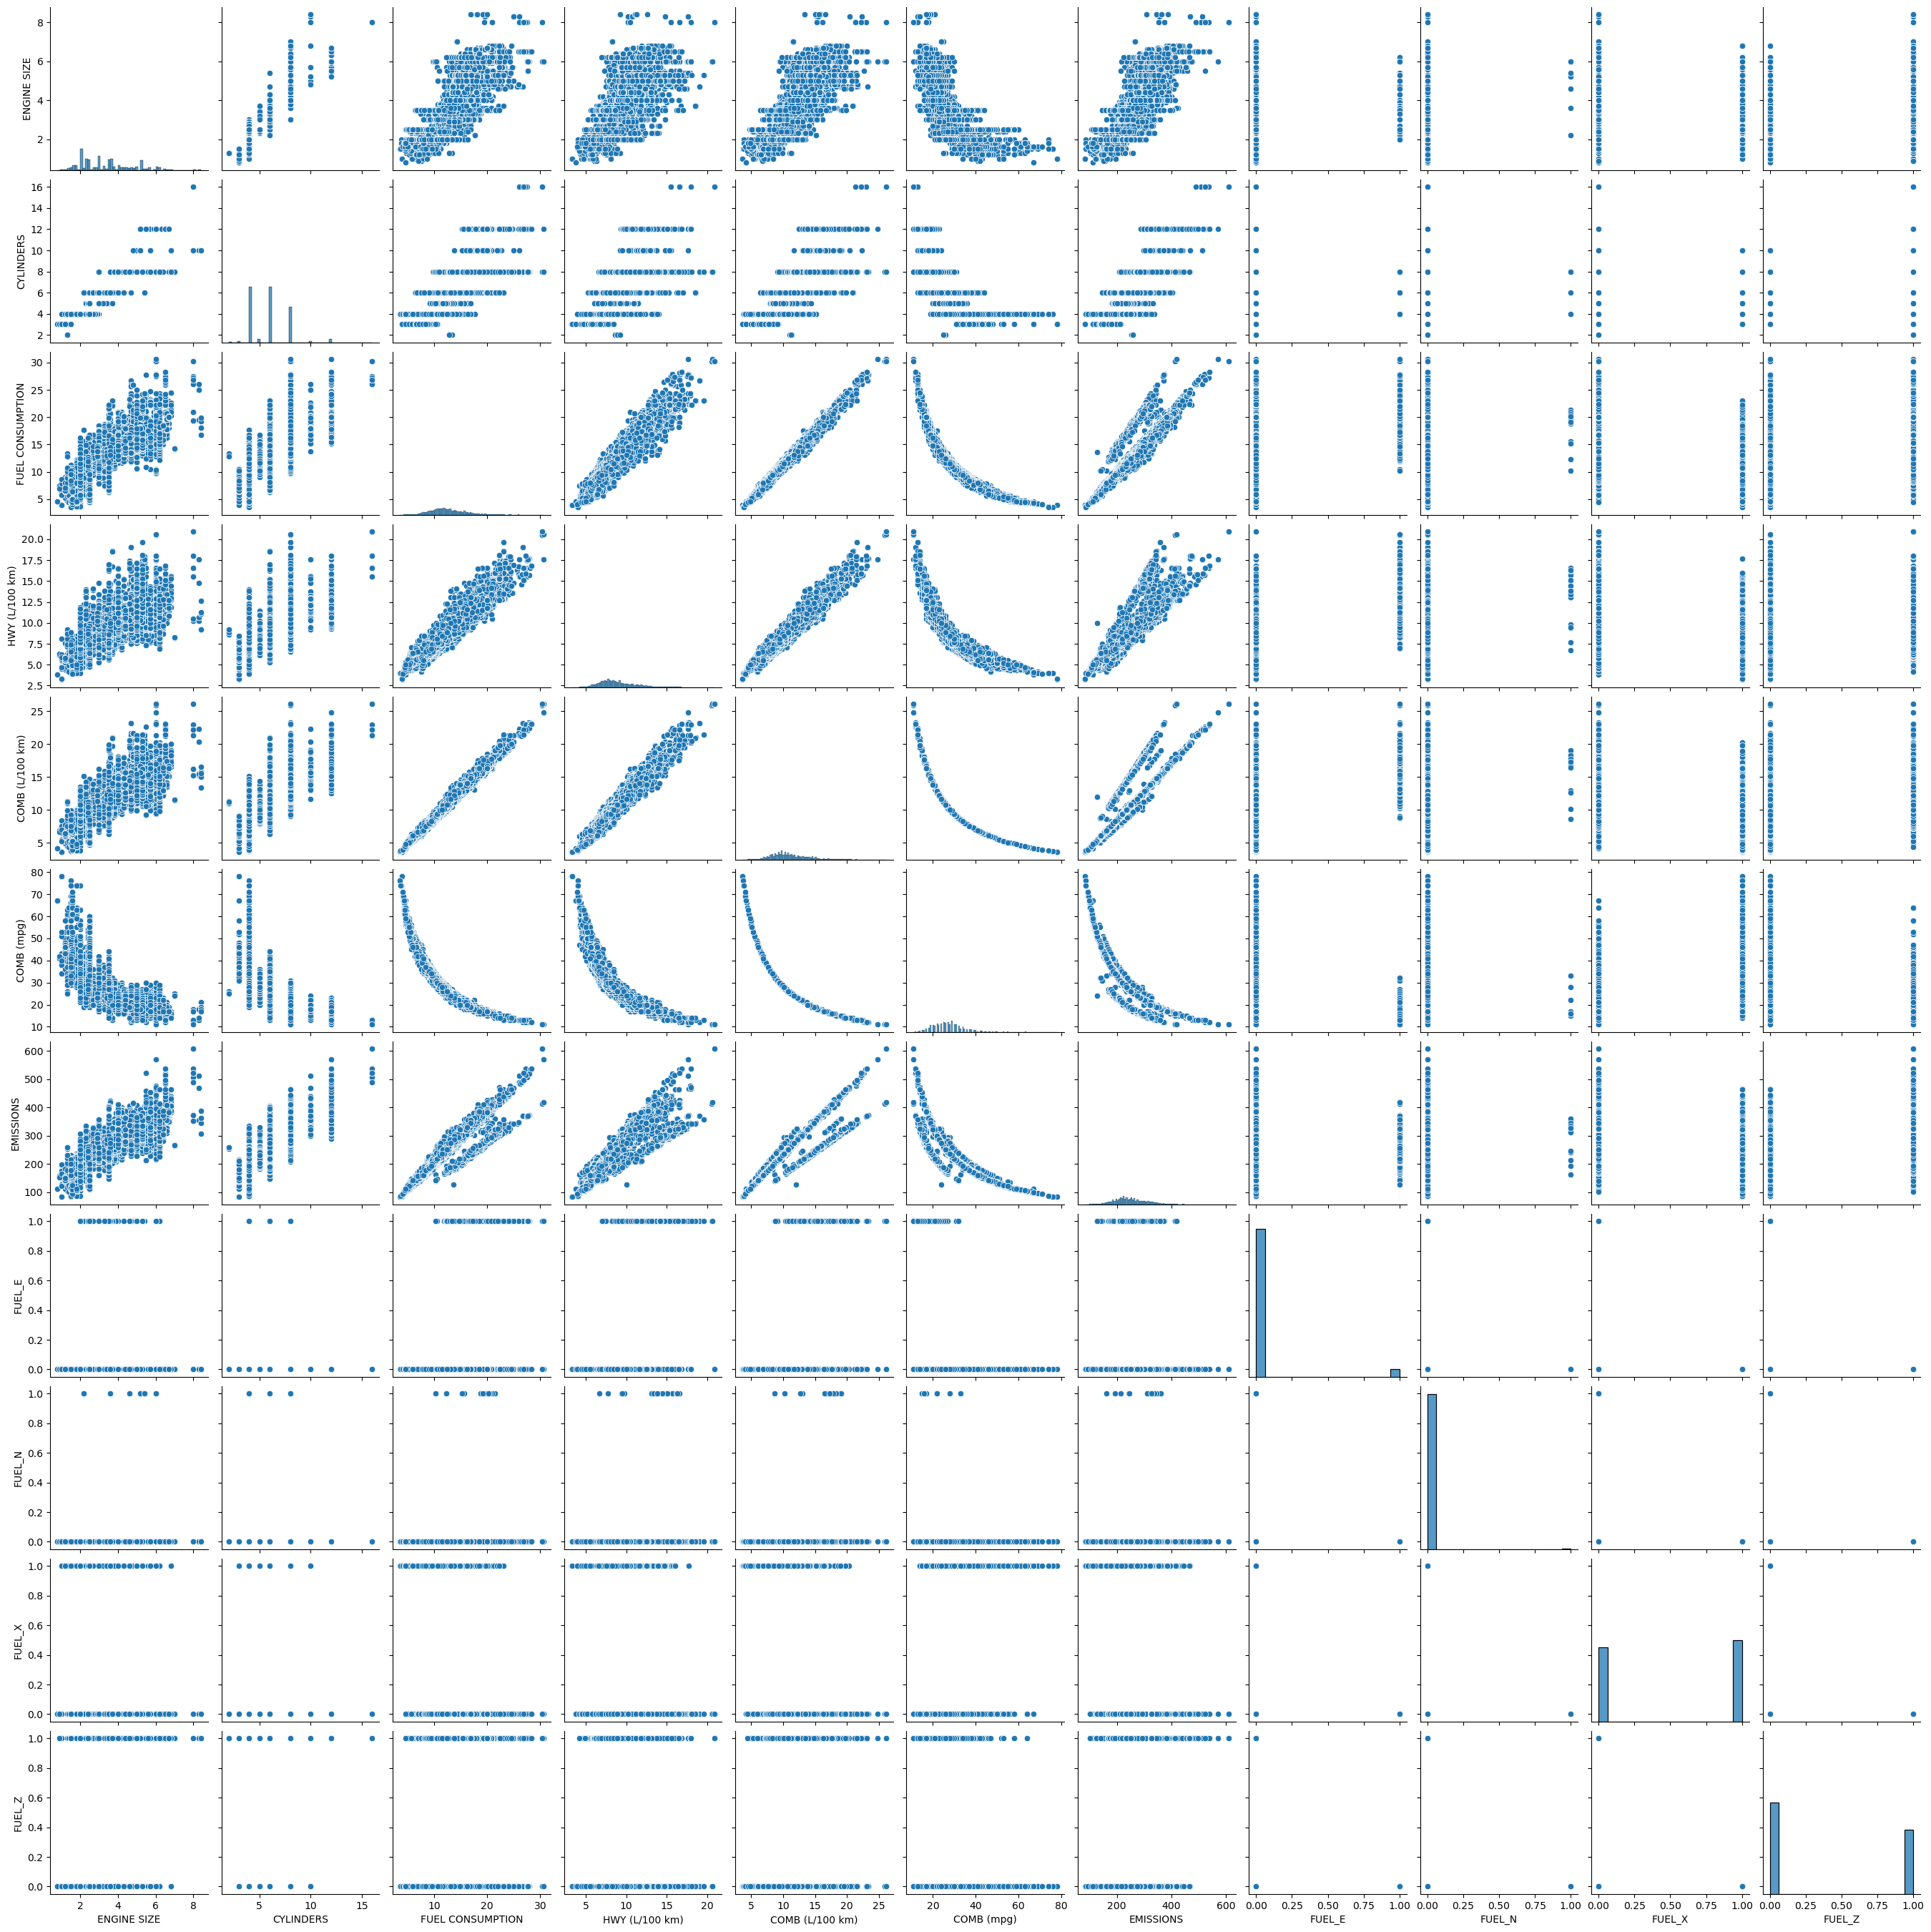

In [51]:
sns.pairplot(data, hue=None,diag_kind="hist")

In [52]:
data.corr()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
ENGINE SIZE,1.000000,0.913385,0.821615,0.749409,0.807329,-0.755006,0.821308,0.174135,0.057355,-0.157966,0.097018
CYLINDERS,0.913385,1.000000,0.794928,0.698321,0.771571,-0.714196,0.802164,0.133400,0.038770,-0.267493,0.223121
FUEL CONSUMPTION,0.821615,0.794928,1.000000,0.942347,0.992959,-0.921355,0.919094,0.430433,0.068457,-0.259268,0.096262
HWY (L/100 km),0.749409,0.698321,0.942347,1.000000,0.975012,-0.884736,0.894767,0.443894,0.079030,-0.174038,0.001152
COMB (L/100 km),0.807329,0.771571,0.992959,0.975012,1.000000,-0.920909,0.922975,0.440656,0.073075,-0.232673,0.064086
COMB (mpg),-0.755006,-0.714196,-0.921355,-0.884736,-0.920909,1.000000,-0.901839,-0.302096,-0.050692,0.230478,-0.128375
EMISSIONS,0.821308,0.802164,0.919094,0.894767,0.922975,-0.901839,1.000000,0.077176,0.040493,-0.172994,0.148404
FUEL_E,0.174135,0.133400,0.430433,0.443894,0.440656,-0.302096,0.077176,1.000000,-0.008547,-0.234327,-0.187277
FUEL_N,0.057355,0.038770,0.068457,0.079030,0.073075,-0.050692,0.040493,-0.008547,1.000000,-0.040173,-0.032107
FUEL_X,-0.157966,-0.267493,-0.259268,-0.174038,-0.232673,0.230478,-0.172994,-0.234327,-0.040173,1.000000,-0.880303


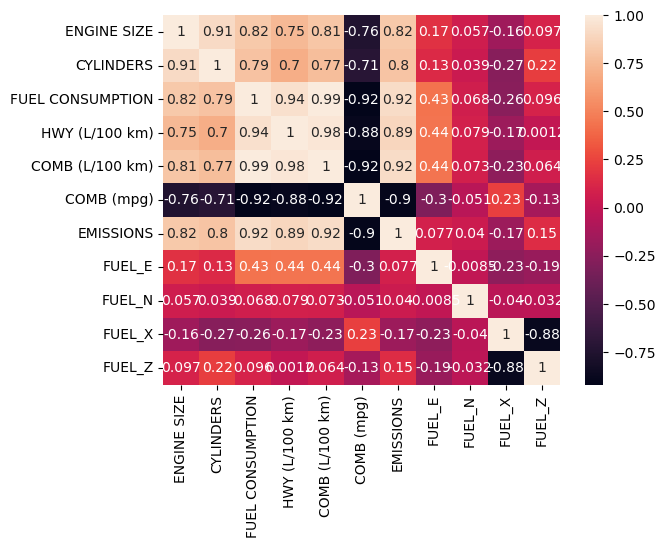

In [53]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [54]:
data.dtypes

ENGINE SIZE         float64
CYLINDERS             int64
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
FUEL_E                uint8
FUEL_N                uint8
FUEL_X                uint8
FUEL_Z                uint8
dtype: object

In [55]:
X=data.drop('EMISSIONS',axis=1)
y=data['EMISSIONS'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Linear Regression

Model = LinearRegression()
Model.fit(X_train,y_train)

y_pred = Model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 2.88
Mean Squared Error (MSE): 22.71
Root Mean Squared Error (RMSE): 4.77
R-squared (R2): 0.99


In [74]:
#Decision Tree Regression

Dtree = DecisionTreeRegressor(max_depth=3, random_state=42)
Dtree.fit(X_train,y_train)

y_pred = Dtree.predict(X_test)

D_mae = mean_absolute_error(y_test, y_pred)
D_mse = mean_squared_error(y_test, y_pred)
D_rmse = np.sqrt(mse)
D_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {D_mae:.2f}")
print(f"Mean Squared Error (MSE): {D_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {D_rmse:.2f}")
print(f"R-squared (R2): {D_r2:.2f}")

Mean Absolute Error (MAE): 13.43
Mean Squared Error (MSE): 407.35
Root Mean Squared Error (RMSE): 2.41
R-squared (R2): 0.89


In [75]:
# random forest regression model
rforest = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Fit the model on the training data
rforest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rforest.predict(X_test)

r_mae = mean_absolute_error(y_test, y_pred)
r_mse = mean_squared_error(y_test, y_pred)
r_rmse = np.sqrt(mse)
r_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {r_mae:.2f}")
print(f"Mean Squared Error (MSE): {r_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {r_rmse:.2f}")
print(f"R-squared (R2): {r_r2:.2f}")

Mean Absolute Error (MAE): 12.06
Mean Squared Error (MSE): 368.41
Root Mean Squared Error (RMSE): 2.41
R-squared (R2): 0.90


In [77]:
#polynomial regression 

poly_features = PolynomialFeatures(degree=2)

# Transform the input features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the transformed testing data
y_pred = model.predict(X_test_poly)

p_mae = mean_absolute_error(y_test, y_pred)
p_mse = mean_squared_error(y_test, y_pred)
p_rmse = np.sqrt(mse)
p_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {p_mae:.2f}")
print(f"Mean Squared Error (MSE): {p_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {p_rmse:.2f}")
print(f"R-squared (R2): {p_r2:.2f}")

Mean Absolute Error (MAE): 1.76
Mean Squared Error (MSE): 5.82
Root Mean Squared Error (RMSE): 2.41
R-squared (R2): 1.00


In [81]:
# Create Ridge and Lasso regression models
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

# Fit the models on the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r1 = r2_score(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (Ridge): {mse_ridge:.2f}")
print(f"Mean Squared Error (Lasso): {mse_lasso: .2f}")
print(f"R-squared (R2) (Ridge): {r1: .2f}")
print(f"R-squared (R2) (Lasso): {r2: .2f}")

Mean Squared Error (Ridge): 22.73
Mean Squared Error (Lasso):  83.34
R-squared (R2) (Ridge):  0.99
R-squared (R2) (Lasso):  0.98


In [90]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest regressor
rforest = RandomForestRegressor(random_state=42)

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 6.971010941637823


In [ ]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split= 2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

C:\Users\USER\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
